<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 3 - Web APIs & NLP

# 05_Modelling - TF-IDF Vectorization

## Importing Libraries & Datasets

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB, MultinomialNB, GaussianNB
from sklearn.model_selection import train_test_split, cross_val_score

from sklearn import metrics
from sklearn.metrics import recall_score, accuracy_score, confusion_matrix, plot_confusion_matrix

In [2]:
tfidf_df = pd.read_csv("../data/vectorized/tfidf.csv")

### Pre-processing: Dummification

In [3]:
# dummify target variable: 1 = stocks, 0 = cryptocurrency
dummify = {"stocks":1, "CryptoCurrency":0}
tfidf_df["subreddit_class"] = tfidf_df["subreddit_class"].map(dummify)
tfidf_df.head()

,subreddit_class,created_utc,text,cleaned_text,cleaned_sentence,char_count,word_count,hour_posted,Unnamed: 8,aa,...,zilliqa,zillows,zim,zinc,zm,zone,zoo,zoom,zooming,zscaler
0,1,1626851004,Advise on Long Term Stock? I am earning very l...,"['advise', 'long', 'term', 'stock', 'earning',...",advise long term stock earning little moment w...,297,59,7,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,1626847423,Dad told me to sell on Monday when the market ...,"['dad', 'told', 'sell', 'monday', 'market', 'r...",dad told sell monday market red bc already pro...,680,140,6,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,1626846017,Merger/accusation question about a game co. An...,"['mergeaccusation', 'question', 'game', 'co', ...",mergeaccusation question game co theater co re...,451,85,5,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,1626845812,Best Software to Track Trades and Create Repor...,"['best', 'software', 'track', 'trade', 'create...",best software track trade create report hi im ...,1088,204,5,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,1626840162,"After Driving My Friends Tesla, Here Are My Th...","['driving', 'friend', 'tesla', 'thought', 'bul...",driving friend tesla thought bullish tesla im ...,663,137,4,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
# setting up the IVs and DV for modelling
X = tfidf_df.iloc[:, 8::]
y = tfidf_df["subreddit_class"]
print(X.shape)
print(y.shape)

(3400, 10272)
(3400,)


### Train-Test Split

In [5]:
# shuffle dataset, set test size as 30% per industry norm
# stratify the train-test split based on target variable
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3,
                                                    stratify=y, random_state=42)

In [6]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(2380, 10272)
(2380,)
(1020, 10272)
(1020,)


## Baseline Model
### The baseline accuracy of the null model is 50%. To do better, our model must yield higher accuracy score.

In [7]:
y_test.value_counts(normalize=True)

0    0.5
1    0.5
Name: subreddit_class, dtype: float64

## Model using  `Tf-idfVectorizer` and `Naive Bayes`

### Using Bernoulli Naive Bayes to predict classification

In [8]:
# converts X-column data i.e. count frequencies to binary format
# values less than or equal to default threshold value = 0.0 is mapped to 0, else to 1. 
BernNB = BernoulliNB(binarize=True)
BernNB.fit(X_train, y_train)
print(BernNB)

# print cross-validation score
print("cv score: ", cross_val_score(BernNB, X_train, y_train, cv=5).mean())

# predicts y values using BernNB & print accuracy and recall score for prediction on classification
y_pred = BernNB.predict(X_test)
print("accuracy score: ", accuracy_score(y_test, y_pred))
print("recall/sensitivity score: ", recall_score(y_test, y_pred))

BernoulliNB(binarize=True)
cv score:  0.5
accuracy score:  0.5
recall/sensitivity score:  0.0


### Using Multinomial Naive Bayes to predict classification

In [9]:
# fit the model based on train datasets 
MultiNB = MultinomialNB()
MultiNB.fit(X_train, y_train)
print(MultiNB)

# print cross-validation score
print("cv score: ", cross_val_score(MultiNB, X_train, y_train, cv=5).mean())

# predicts y values using MultinomialNB & print accuracy and recall score
y_pred = MultiNB.predict(X_test)
print("accuracy score: ", accuracy_score(y_test, y_pred))
print("recall/sensitivity score: ", recall_score(y_test, y_pred))

MultinomialNB()
cv score:  0.9512605042016806
accuracy score:  0.9519607843137254
recall/sensitivity score:  0.9156862745098039


### Using Gaussian Naive Bayes to predict classification

In [10]:
# fit the model based on train datasets 
GausNB = GaussianNB()
GausNB.fit(X_train, y_train)
print(GausNB)

# print cross-validation score
print("cv score: ", cross_val_score(GausNB, X_train, y_train, cv=5).mean())

# predicts y values using MultinomialNB & print accuracy and recall score
y_pred = GausNB.predict(X_test)
print("accuracy score: ", accuracy_score(y_test, y_pred))
print("recall/sensitivity score: ", recall_score(y_test, y_pred))

GaussianNB()
cv score:  0.8012605042016807
accuracy score:  0.7941176470588235
recall/sensitivity score:  0.792156862745098


### The Multinomial Naive Bayes model has the best scores among all Naive Bayes models:
- **Accuracy score > 0.95** (i.e. > baseline, Gaussian NB and Bernoulli NB); and
- **Sensitivity score > 0.91** (i.e. > Gaussian NB and Bernoulli NB).

## Model using `Tf-idfVectorizer` and `LogisticRegression`

In [11]:
# fit the model based on train datasets 
logreg = LogisticRegression(random_state=42)
logreg.fit(X_train, y_train)
print(logreg)

# print cross-validation score
print("cv score: ", cross_val_score(logreg, X_train, y_train, cv=5).mean())

# predicts y values using LogisticRegression & print accuracy score
y_pred = logreg.predict(X_test)
print("accuracy score: ", accuracy_score(y_test, y_pred))
print("recall/sensitivity score: ",  recall_score(y_test, y_pred))

LogisticRegression(random_state=42)
cv score:  0.9634453781512604
accuracy score:  0.9558823529411765
recall/sensitivity score:  0.9647058823529412


## Using the Td-idf vectorization method, the Logistic Regression model produces higher accuracy and sensitivity scores than the Multinomial Naive Bayes model. 

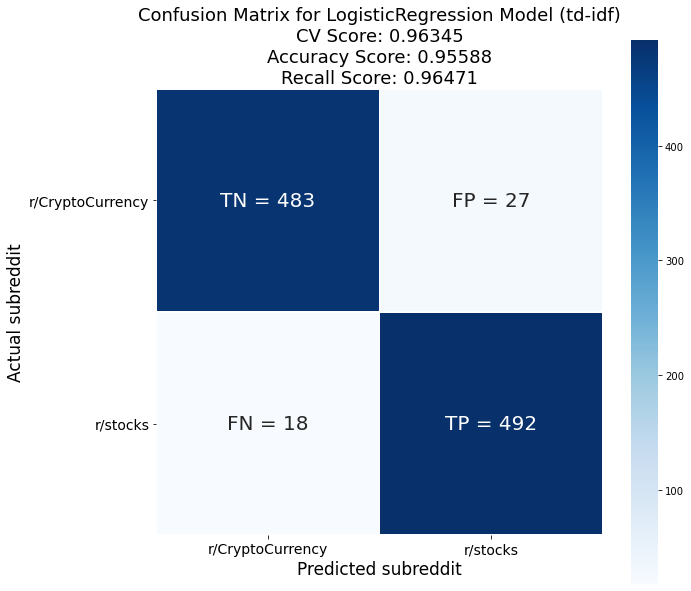

In [12]:
# we proceed to generate confusion matrix for the Logistic Regression model
cm = confusion_matrix(y_test, y_pred)

# create modified labels for confusion matrix
modified_cm = []

for index,value in enumerate(cm):
    if index == 0:
        modified_cm.append(['TN = ' + str(value[0]), 'FP = ' + str(value[1])])
    if index == 1:
        modified_cm.append(['FN = ' + str(value[0]), 'TP = ' + str(value[1])])   

# plot it!
plt.figure(figsize=(10,10))
ax = sns.heatmap(cm, annot=np.array(modified_cm),
            fmt="", annot_kws={"size": 20},
            linewidths=.5,
            square = True,
            cmap = 'Blues')

plt.title("Confusion Matrix for LogisticRegression Model (td-idf)"+ "\n"
          + 'CV Score: {0:.5f}'.format(cross_val_score(logreg, X_train, y_train, cv=5).mean()) + "\n"
          + 'Accuracy Score: {0:.5f}'.format(accuracy_score(y_test, y_pred)) + "\n"
          + 'Recall Score: {0:.5f}'.format(recall_score(y_test, y_pred)), 
          size = 18) 
plt.ylabel('Actual subreddit', fontsize = 17)
plt.xlabel('Predicted subreddit', fontsize = 17)
ax.set_xticklabels(["r/CryptoCurrency", "r/stocks"], fontsize = 14)
ax.set_yticklabels(["r/CryptoCurrency", "r/stocks"], fontsize = 14, rotation = 0)

plt.savefig('../image/tfidf-cm.png');